In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


This data is from the "Bike sharing demand" compettition on Kaggle. [The bike sharing data](https://www.kaggle.com/competitions/bike-sharing-) demand/overview. I will be using only the train set to train and a portion of it to test the efficiency of my machine learning algorithm prediction. Click on the link provided for more details.

In [4]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [5]:
train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

NO missing values in our data set.

In [6]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
train_df['season'].unique(), train_df['season'].nunique()

(array([1, 2, 3, 4], dtype=int64), 4)

In [8]:
train_df['holiday'].unique(),train_df['holiday'].nunique()

(array([0, 1], dtype=int64), 2)

In [9]:
train_df['weather'].unique(),train_df['weather'].nunique()

(array([1, 2, 3, 4], dtype=int64), 4)

In [10]:
 train_df['humidity'].nunique()

89

In [11]:
 train_df['humidity'].max(),  train_df['humidity'].min()

(100, 0)

In [12]:
train_df['workingday'].unique(),train_df['workingday'].nunique()

(array([0, 1], dtype=int64), 2)

In [13]:
train_df['count'].nunique()

822

# exploratory data analysis
To do this, we will first convert the datetime column into datatime format

Now lets work with the datetime column. The data time column is in the object format, we will convert it to datetime format using the pandas datetime module. --->

In [14]:
train_df['datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10886 entries, 0 to 10885
Series name: datetime
Non-Null Count  Dtype 
--------------  ----- 
10886 non-null  object
dtypes: object(1)
memory usage: 85.2+ KB


In [15]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])

In [16]:
train_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [17]:
train_df['datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10886 entries, 0 to 10885
Series name: datetime
Non-Null Count  Dtype         
--------------  -----         
10886 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 85.2 KB


In [18]:
train_df['hour'] = train_df['datetime'].apply(lambda date: date.hour)
train_df['weekday'] = train_df['datetime'].apply(lambda date: date.weekday())
train_df['month'] = train_df['datetime'].apply(lambda date: date.month)
train_df['year'] = train_df['datetime'].apply(lambda date: date.year)

In [19]:
train_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,2011


In [20]:
train_df['year'].unique()

array([2011, 2012], dtype=int64)

In [21]:
train_df['weekday'].nunique(), train_df['weekday'].unique()

(7, array([5, 6, 0, 1, 2, 3, 4], dtype=int64))

Lets begin exploring our data through visualizations

<Axes: xlabel='hour', ylabel='count'>

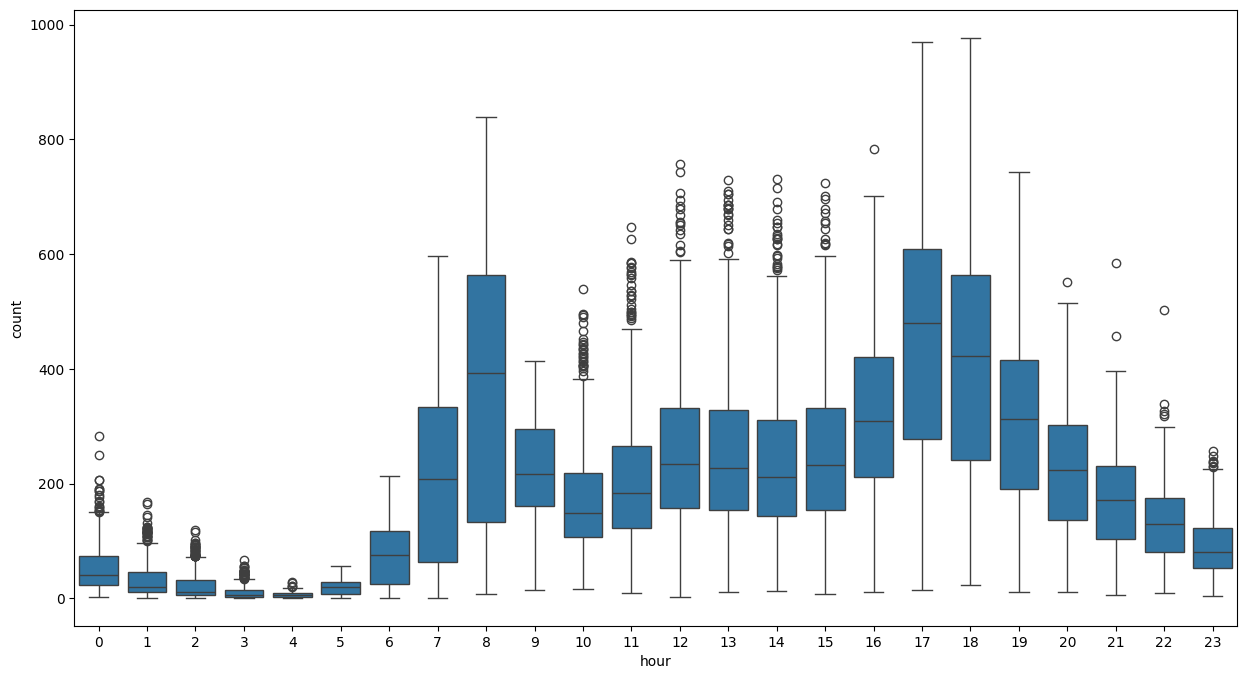

In [22]:
plt.figure(figsize=(15,8))
sns.boxplot(data=train_df, x='hour', y='count')

From the above, It is can be seen that the numbers starts peaking at around 7am and peaked at 8am, which is usually the morning rushing hour. It stabilizes and later starts peaking at 4pm and peaked the highest at 5pm, which is usually the evening peak hour. lets explore it by weekday --->

<Axes: xlabel='weekday', ylabel='count'>

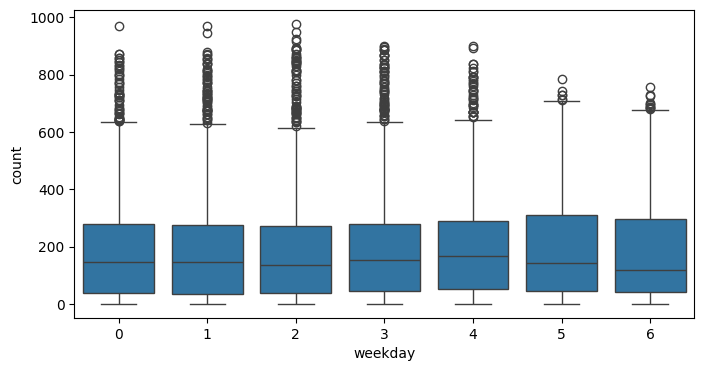

In [23]:
plt.figure(figsize=(8,4))
sns.boxplot(data=train_df, x='weekday', y='count')

The difference here is not as obvious as hourly mean. This makes sense since even during weekends, people still use bikes for recreation and other personal usage. saturday is the lowest showing a drop in mean of total counts as it is the first day of the weekend. 

This plot more clearly shows the pattern of the usage. it drops by friday and starts to increase signigicantly by monday.

<Axes: xlabel='weekday'>

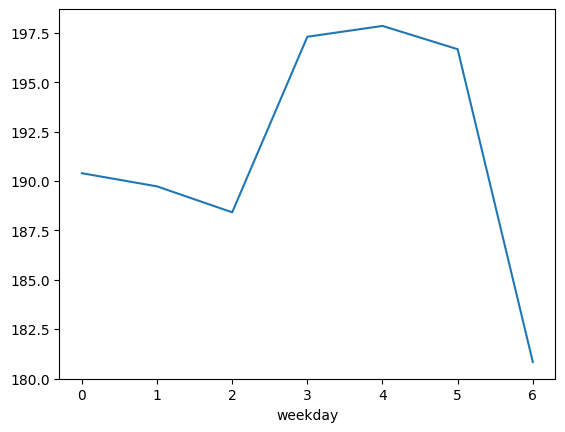

In [24]:
train_df.groupby('weekday').mean()['count'].plot()

This plot more clearly shows the pattern of the usage. it drops by friday and starts to increase signigicantly by monday.lets view it monthly-->

<Axes: xlabel='month', ylabel='count'>

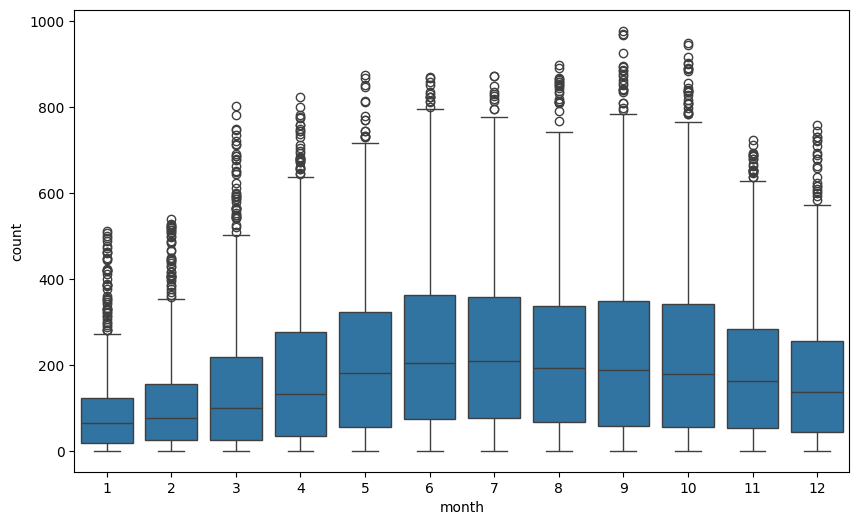

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train_df, x='month', y='count')

The mean of total users lowest in the early year and late, and also peaks during the mid year around june, july and august. We should remember that december through January is winter and holidays season in washington DC: where the data originate. while the peak here is during and around Summertime. Lets view it through the years---->

<Axes: xlabel='year', ylabel='count'>

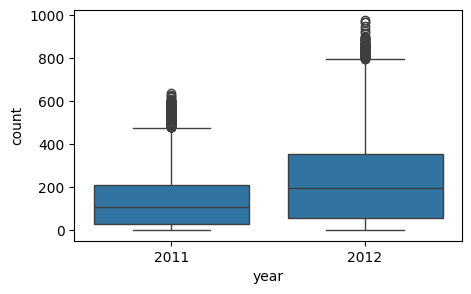

In [26]:
plt.figure(figsize=(5,3))
sns.boxplot(data=train_df, x='year', y='count')

In [27]:
train_df['year'].value_counts()

year
2012    5464
2011    5422
Name: count, dtype: int64

There is an obvious increase in the number of total users form 2011 to 2012. This may be due to couple reasons such as Increase in the number of Bicycles and access, Awareness, Incentives such as cheapness of ride and so on. Since the total number of years is significantly balanced, what gap in the mean is due to the increase in the number of 'count', I.e more people are riding the bicycle in 2012 than the previous year. Lets see it froom the plot below --->

<Axes: xlabel='year', ylabel='count'>

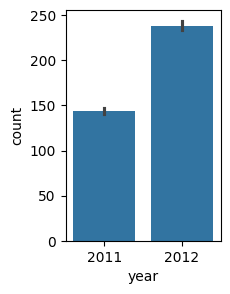

In [28]:
plt.figure(figsize=(2,3))
sns.barplot(data=train_df,x='year',y='count')

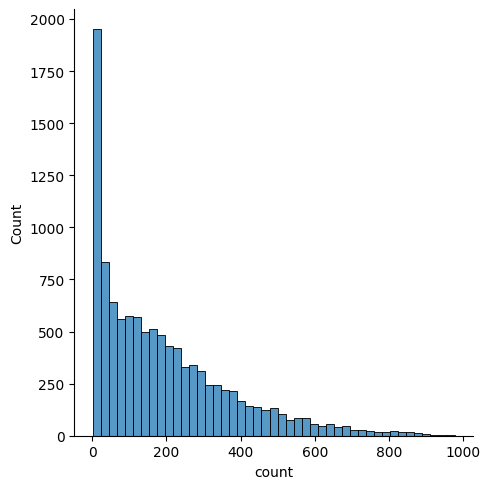

In [29]:
sns.displot(data=train_df,x='count')

NOW, LET US EXPLORE THE CORRELATION OF THE DATA FEATURES

In [30]:
corr = train_df.corr(numeric_only=True)

In [31]:
corr['count'].sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
year          0.260403
month         0.166862
season        0.163439
windspeed     0.101369
workingday    0.011594
weekday      -0.002283
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

We can see the correlation of all the features with the total count. It makes sense that the registered and casual have highest correlation with the total count as their sum is equal to the count itself. The temperatue and feel comes next which we are yet to explore. Humidity has the highest negative correlation to count. Before we keep exploring, let's view the correlation in a chart:

<Axes: >

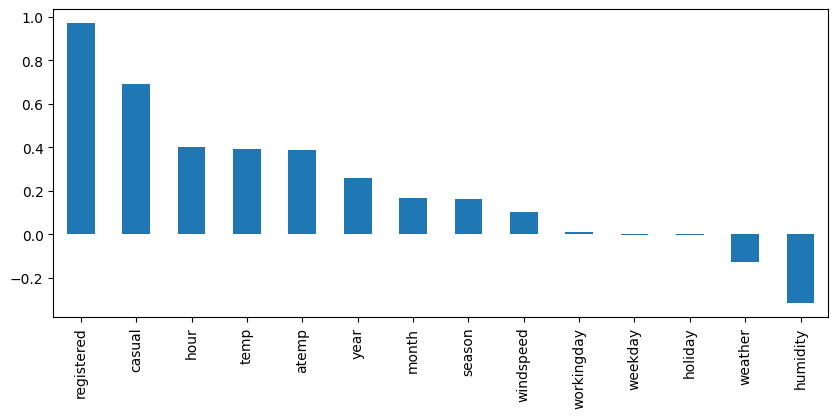

In [32]:
plt.figure(figsize=(10,4))
corr['count'].sort_values(ascending=False)[1:].plot(kind='bar')

Weekday, holiday and working day have the lowest correlation to our target, count. I will decide on whether to drop any as we go forward with more exploration and insights. Lets view the heat map before proceeding

<Axes: >

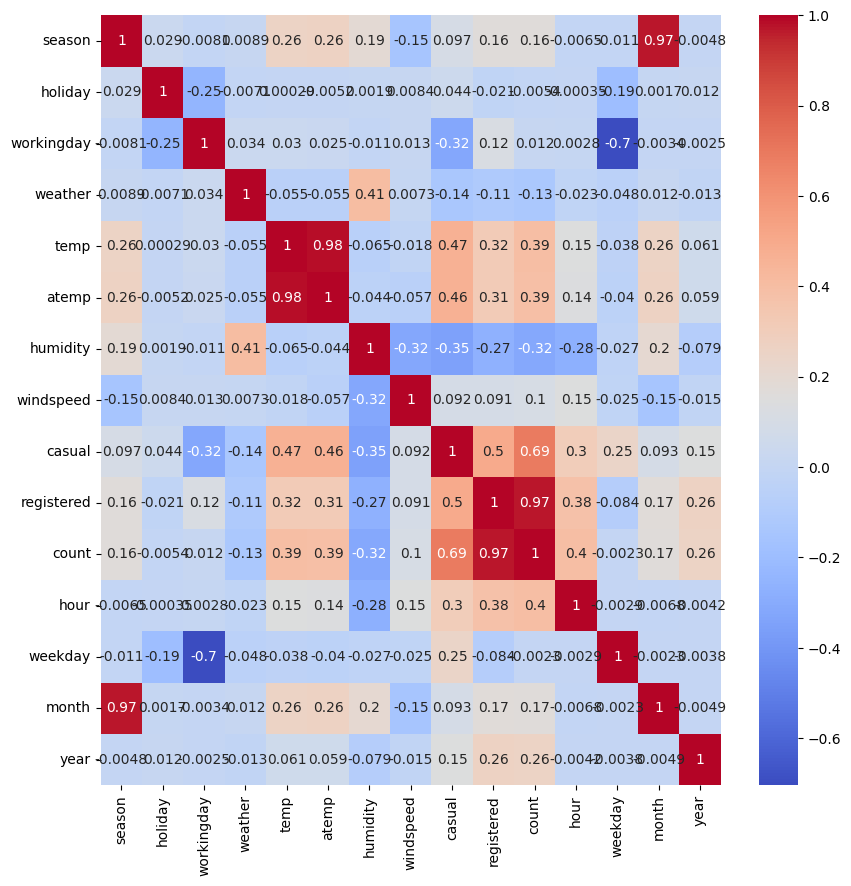

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

Ofcourse Weekday and workingday have a high negative correlation. Lets check their plot to see the trends and how the negative correlation comes to be. Remember that the working days are 1 and non-working days are 0. weekdays starts from monday as 0 to sunday as 6. the trends plot ---->

In [34]:
# number of non working days that concides with sundays
len(train_df[(train_df['workingday'] == 0) & (train_df['weekday'] == 6)])

1579

In [35]:
# number of non working days that concides with saturday
len(train_df[(train_df['workingday'] == 0) & (train_df['weekday'] == 5)])

1584

<Axes: xlabel='weekday', ylabel='workingday'>

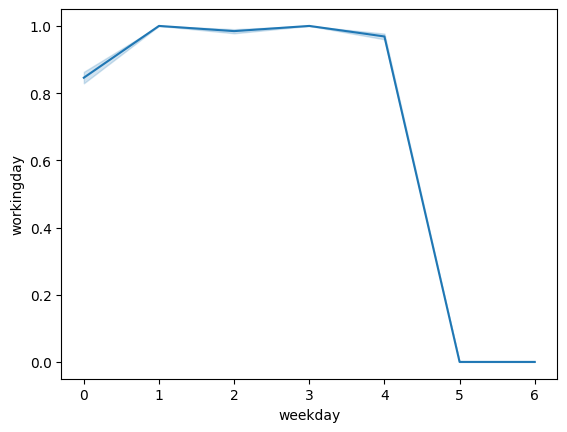

In [36]:
sns.lineplot(x='weekday',y='workingday',data=train_df,)

The plot above aggregate the data by taking the mean of the working day per weekday. But since generally weekends are non working days, lets create a lineplot for that. By the way, The plot above clearly shows why the high correlation is negative.

In [37]:
train_df.groupby('weekday')['workingday'].agg(lambda x: x.mode()[0]).reset_index()

,weekday,workingday
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
5,5,0
6,6,0


<Axes: xlabel='weekday', ylabel='workingday'>

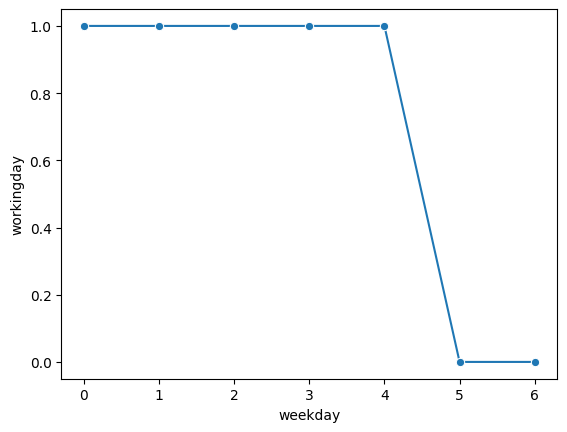

In [38]:
binary_df = train_df.groupby('weekday')['workingday'].agg(lambda x: x.mode()[0]).reset_index()

sns.lineplot(x='weekday', y='workingday', data=binary_df, errorbar=None,marker='o')

Above is plot showing weekends are as non workig days and weekdays as working days.Now since weekdays and weekends have a high correlation, with weekdays having the least correlation with "count" amongst all the other features, we will drop the weekdays from our data set and work with only the workingday instead.

In [39]:
train_df = train_df.drop('weekday', axis=1)

In [40]:
train_df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011


The next highly correlated features to 'count' (besides registered and casual) are Temperature('temp') and the temperature feel('atemp').let's see them using lineplot --->

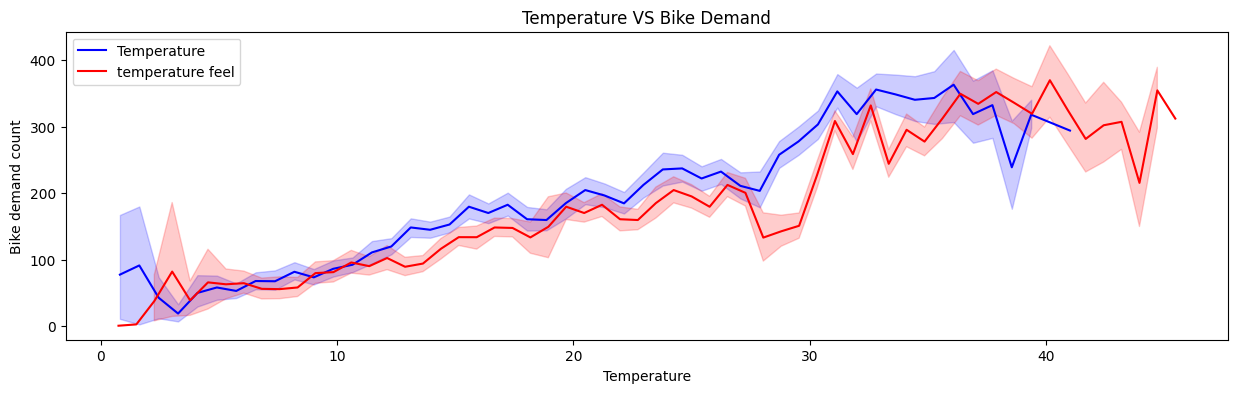

In [41]:
plt.figure(figsize=(15,4))
sns.lineplot(data=train_df, x='temp', y='count', legend='full',color='b', label = 'Temperature')
sns.lineplot(data=train_df, x='atemp', y='count', legend='full',color='red', label = 'temperature feel')

plt.title('Temperature VS Bike Demand')
plt.xlabel('Temperature')
plt.ylabel('Bike demand count')
plt.legend()

The trend shows that demand generally rises from about 3 degress celcius till about 32 before falling. which shows most bicycle users tend not to use them often in extreme temperate. lets see the number of users by weather and seasons:
Remember that: 

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter , and

weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.

 So in both features, 2 and 3 are kind of best to moderate condition for going out biking. Lets see the numbers to confirm:

In [42]:
train_df.groupby('season').mean()[['temp','atemp','count']]

,temp,atemp,count
season,,,
1,12.530491,15.228956,116.343261
2,22.823483,26.647098,215.251372
3,28.789111,32.540783,234.417124
4,16.649239,20.059909,198.988296


In [43]:
train_df.groupby('weather').mean()[['temp','atemp','count']]

,temp,atemp,count
weather,,,
1,20.557122,23.994126,205.236791
2,19.614608,23.072414,178.955540
3,19.546356,22.753091,118.846333
4,8.200000,11.365000,164.000000


Just as we have expected, '2' and '3' have higher count except for the '4' in weather, which has a higher number of count than '3'. lets check again including the registered and casual column.

In [44]:
train_df.groupby('weather').mean()[['temp','atemp','casual','registered','count']]

,temp,atemp,casual,registered,count
weather,,,,,
1,20.557122,23.994126,40.308676,164.928115,205.236791
2,19.614608,23.072414,30.785462,148.170078,178.955540
3,19.546356,22.753091,17.442375,101.403958,118.846333
4,8.200000,11.365000,6.000000,158.000000,164.000000


In [45]:
train_df[train_df['weather'] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,18,1,2012


In [46]:
train_df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

And there it is. It has only one entry, so the aggregate return the same value. Lets view the counts for each weather category in every season. ---->

<Axes: xlabel='season', ylabel='count'>

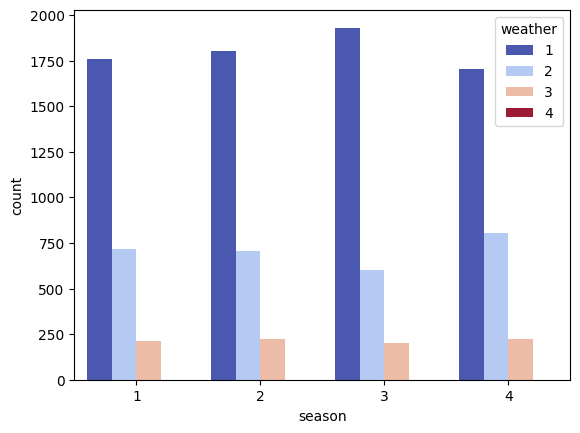

In [47]:
sns.countplot(data=train_df, x='season', hue='weather', palette='coolwarm')

We can see that there is barely anything from the plot when the weather is at '4'. i.e extreme.  

Now let's view the relationship between season, weather and the count column 

<Axes: xlabel='season', ylabel='count'>

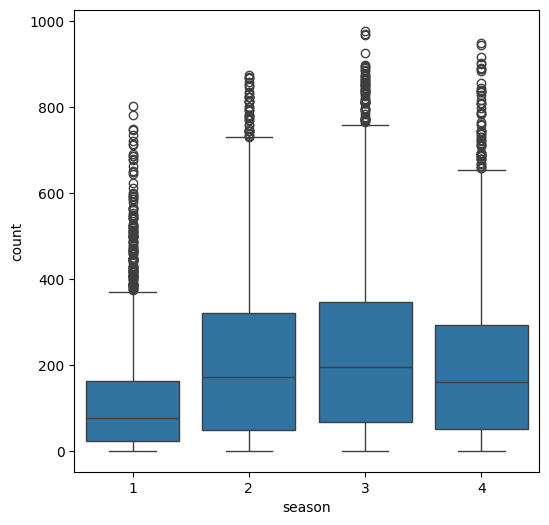

In [48]:
plt.figure(figsize=(6,6))
sns.boxplot(data=train_df, x='season', y='count')

In [49]:
train_df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

season-1 is spring in washington DC where rainfall is regular so bike usage is significantly less. fall has the highest due to it being favorable for going out followed by summer.

<Axes: xlabel='weather', ylabel='count'>

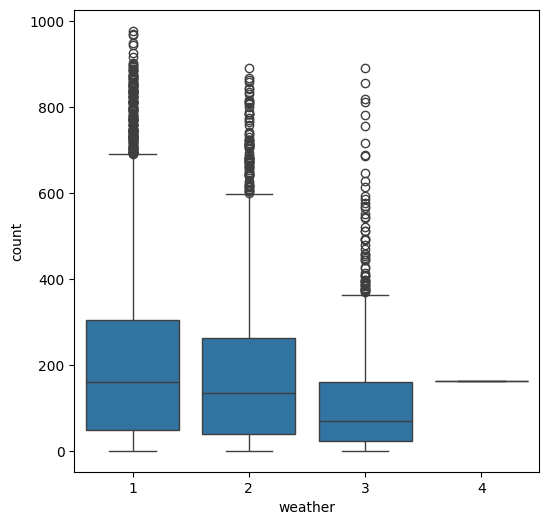

In [50]:
plt.figure(figsize=(6,6))
sns.boxplot(data=train_df, x='weather', y='count')

weather '1' has the highest count due to it being clear and dry, thus favorable for riding. weather '3' is the lowest among the first three due to it being the harshest amongst them. weather 4 only has one entry, although with alot of registrations, probably in anticipation of weather 1.

Now lets work on holiday and then humidity, which has the highest negative correlation to 'count'. 